# Projet IFT712 2022 - classification de feuilles d'arbres
## Raphaël LION, Victor MANTEL, Arthur BAUDOT

## Importation des librairies et fichiers nécessaires

In [1]:
from classifieurs.modele_probabiliste import *
import visualiserDonnees
from tests import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

import warnings 
warnings.filterwarnings('ignore')

## Importation et visualisation des données d'entraînement et de test

### Importation

In [2]:
# Importation :

train = pd.read_csv('data/train.csv')
train = train.drop("id",axis=1)
test = pd.read_csv('data/test.csv')
test = test.drop("id",axis=1)
le = LabelEncoder()
le.fit(train.species)

# Extraction des ensembles d'entraînement et de test :
X = train
y = train.pop("species")
y = le.transform(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42,shuffle=True, stratify=y)

# Normalisation des données :
scaler = StandardScaler()
scaler.fit(X_train)
X_train_normalized = scaler.transform(X_train)
X_test_normalized = scaler.transform(X_test)

### Visualisation des données

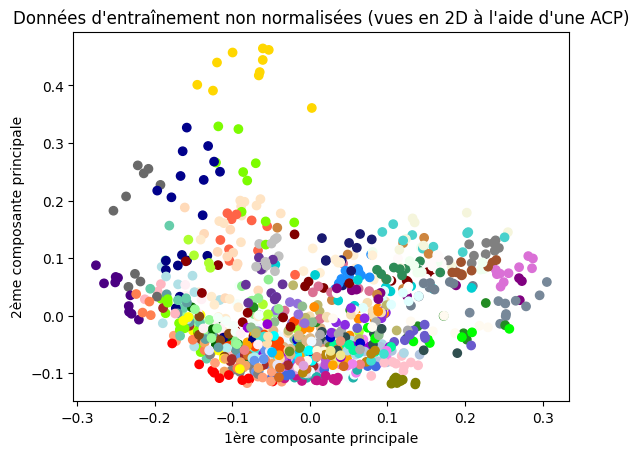

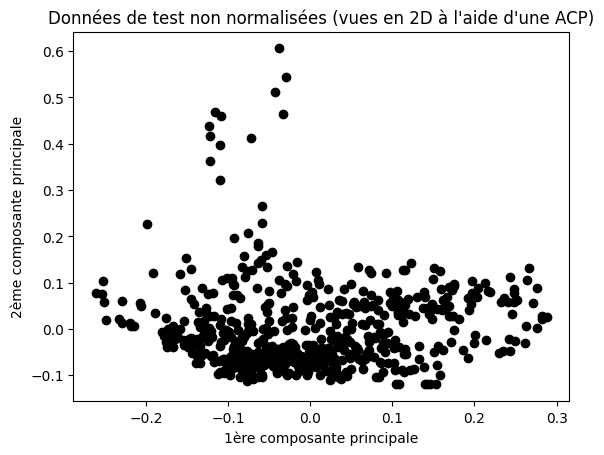

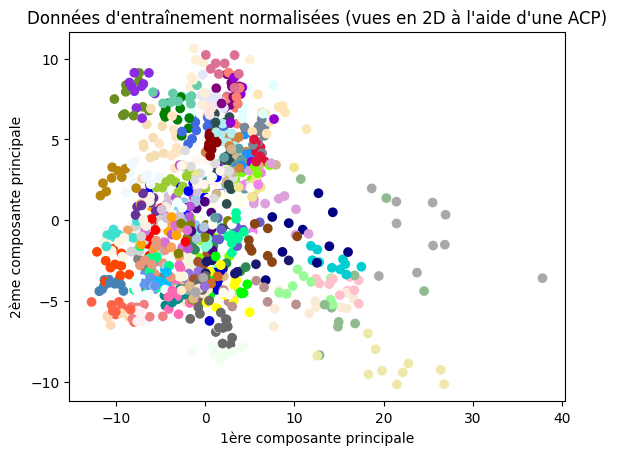

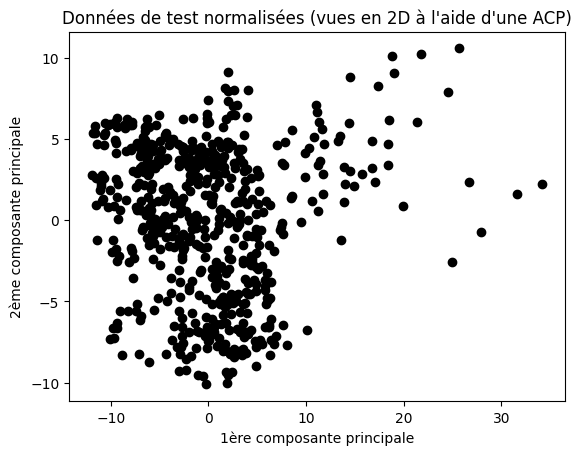

In [3]:
# Données non normalisées :
reference = np.unique(y)
vizualizer = visualiserDonnees.visualiserDonnees(train.to_numpy(), test.to_numpy(), y, reference)
vizualizer.visualiserEntrainement(normalized = False)
vizualizer.visualiserTest(normalized=False)

# Données normalisées :
vizualizer_normalized = visualiserDonnees.visualiserDonnees(scaler.transform(train), scaler.transform(test), y, reference)
vizualizer_normalized.visualiserEntrainement(normalized = True)
vizualizer_normalized.visualiserTest(normalized=True)

### Test de normalité :

In [7]:
from pingouin import multivariate_normality

sample = train.iloc[:100,2:4]
result_normality = multivariate_normality(sample, alpha=0.05)
p_value = result_normality.pval
print("p-valeur : ",p_value)
if p_value < 0.1:
    print("Test de normalité échoué")
else:
    print("Test de normalité réussi")

p-valeur :  2.4671957078088008e-11
Test de normalité échoué


## Implémentation des classifieurs

In [4]:
f1_no_parameters = [] #liste des f1-scores pour chaque classifieur, sans recherche d'hyper-paramètres
f1_parameters = [] #liste des f1-scores pour chaque classifieur, avec recherche d'hyper-paramètres
f1_normalized_no_parameters = []
f1_normalized_parameters = []
models = [] #liste des classifieurs utilisés

### 1.1 Gaussian Naive Bayes Classifier

#### Données non normalisées

In [5]:
# Sans recherche d'hyper-paramètres

models.append('GaussianNB')

gaussian_classifier = GaussianNB_Classifier()
gaussian_classifier.train(X_train,y_train)

y_pred = gaussian_classifier.predict(X_test)
score = gaussian_classifier.error(y_pred,y_test)

f1_no_parameters.append(score['f1-score'])
print(score)

{'f1-score': 0.6212121212121212}


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[0.003511191734215131]
{'var_smoothing': 0.003511191734215131}


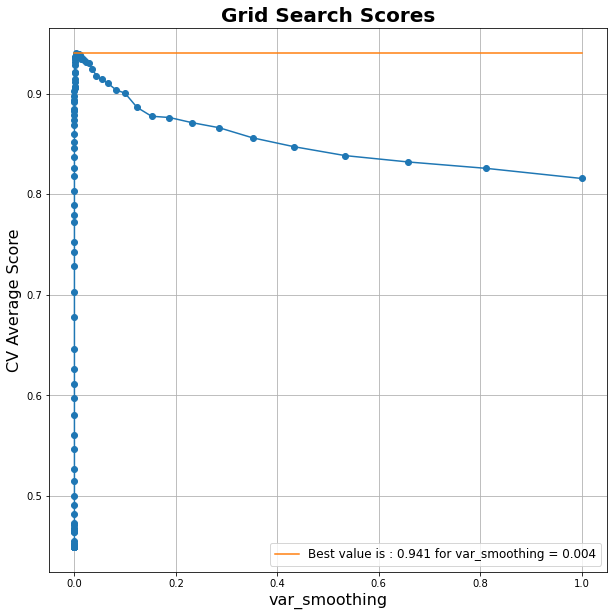

In [6]:
# Avec recherche d'hyper-paramètres

# create an instance of the GaussianNBClassifier class with a dictionary of hyperparameters to search over
gaussian_classifier = GaussianNB_Classifier({'var_smoothing': np.logspace(0, -9, num=100)})

# find the best hyperparameters for the classifier
gaussian_best_params = gaussian_classifier.hyperparameter_search(X_train, y_train, k=5,graphic=True)
print(gaussian_best_params)

In [7]:
gaussian_classifier = GaussianNB_Classifier()
gaussian_classifier.setParameter(gaussian_best_params)

gaussian_classifier.train(X_train,y_train)

y_pred = gaussian_classifier.predict(X_test)

score = gaussian_classifier.error(y_pred,y_test)
f1_parameters.append(score['f1-score'])

print(score)

{'f1-score': 0.9545454545454546}


#### Données normalisées

In [8]:
# Sans recherche d'hyper-paramètres

gaussian_classifier = GaussianNB_Classifier()
gaussian_classifier.train(X_train_normalized,y_train)

y_pred = gaussian_classifier.predict(X_test_normalized)
score = gaussian_classifier.error(y_pred,y_test)

f1_normalized_no_parameters.append(score['f1-score'])
print(score)

{'f1-score': 0.6111111111111112}


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[0.2848035868435802]
{'var_smoothing': 0.2848035868435802}


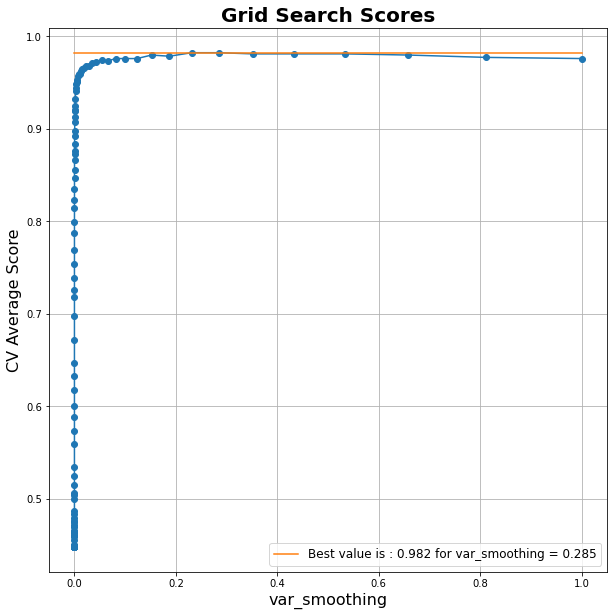

In [9]:
# Avec recherche d'hyper-paramètres

# create an instance of the GaussianNBClassifier class with a dictionary of hyperparameters to search over
gaussian_classifier = GaussianNB_Classifier({'var_smoothing': np.logspace(0, -9, num=100)})

# find the best hyperparameters for the classifier
gaussian_best_params = gaussian_classifier.hyperparameter_search(X_train_normalized, y_train, k=5,graphic=True)
print(gaussian_best_params)

In [10]:
gaussian_classifier = GaussianNB_Classifier()
gaussian_classifier.setParameter(gaussian_best_params)

gaussian_classifier.train(X_train_normalized,y_train)

y_pred = gaussian_classifier.predict(X_test_normalized)

score = gaussian_classifier.error(y_pred,y_test)
f1_normalized_parameters.append(score['f1-score'])

print(score)

{'f1-score': 0.9747474747474747}


### 1.2 Bernoulli Naive Bayes Classifier 

#### Données non normalisées

In [11]:
models.append('BernoulliNB')

bernoulli_classifier = BernoulliNB_Classifier()
bernoulli_classifier.train(X_train,y_train)

y_pred = bernoulli_classifier.predict(X_test)
score = bernoulli_classifier.error(y_pred,y_test)

f1_no_parameters.append(score['f1-score'])
print(score)

{'f1-score': 0.8131313131313131}


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[0.0506]
{'alpha': 0.0506}


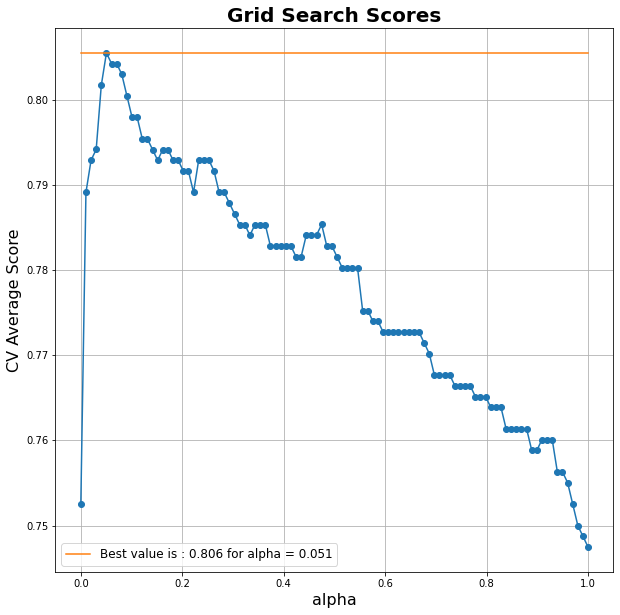

In [12]:
# Recherche hyper-paramètres

# create an instance of the BernoulliNBClassifier class with a dictionary of hyperparameters to search over
bernoulli_classifier = BernoulliNB_Classifier({'alpha': np.linspace(0.0001, 1, num=100)})

# find the best hyperparameters for the classifier
bernoulli_best_params = bernoulli_classifier.hyperparameter_search(X_train, y_train, k=5,graphic=True)
print(bernoulli_best_params)

In [13]:
bernoulli_classifier = BernoulliNB_Classifier()
bernoulli_classifier.setParameter(bernoulli_best_params)

bernoulli_classifier.train(X_train,y_train)

y_pred = bernoulli_classifier.predict(X_test)

score = bernoulli_classifier.error(y_pred,y_test)
f1_parameters.append(score['f1-score'])

print(score)

{'f1-score': 0.803030303030303}


#### Données normalisées

In [14]:
bernoulli_classifier = BernoulliNB_Classifier()
bernoulli_classifier.train(X_train_normalized,y_train)

y_pred = bernoulli_classifier.predict(X_test_normalized)
score = bernoulli_classifier.error(y_pred,y_test)

f1_normalized_no_parameters.append(score['f1-score'])
print(score)

{'f1-score': 0.9545454545454546}


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[0.060700000000000004]
{'alpha': 0.060700000000000004}


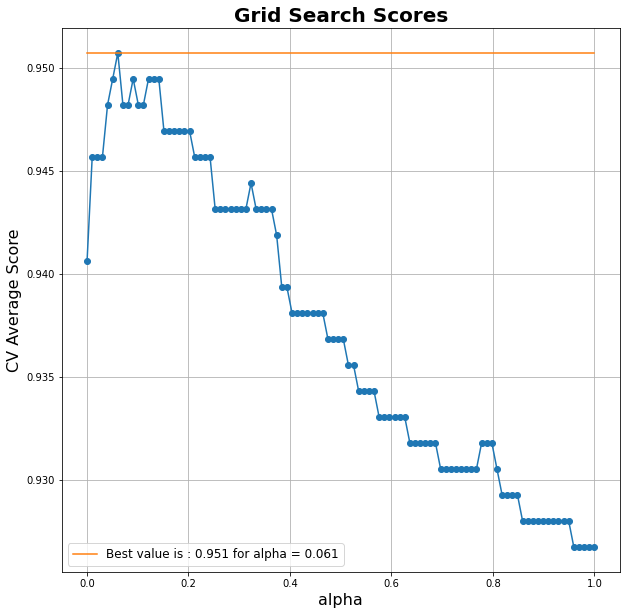

In [15]:
# Recherche hyper-paramètres

# create an instance of the BernoulliNBClassifier class with a dictionary of hyperparameters to search over
bernoulli_classifier = BernoulliNB_Classifier({'alpha': np.linspace(0.0001, 1, num=100)})

# find the best hyperparameters for the classifier
bernoulli_best_params = bernoulli_classifier.hyperparameter_search(X_train_normalized, y_train, k=5,graphic=True)
print(bernoulli_best_params)

In [16]:
bernoulli_classifier = BernoulliNB_Classifier()
bernoulli_classifier.setParameter(bernoulli_best_params)

bernoulli_classifier.train(X_train_normalized,y_train)

y_pred = bernoulli_classifier.predict(X_test_normalized)

score = bernoulli_classifier.error(y_pred,y_test)
f1_normalized_parameters.append(score['f1-score'])

print(score)

{'f1-score': 0.9595959595959596}


### 2. Régression logistique

#### Données non normalisées

In [68]:
models.append('LogisticRegression')

logistic_classifier = LogisticRegression_Classifier()
logistic_classifier.train(X_train,y_train)

y_pred = logistic_classifier.predict(X_test)
score = logistic_classifier.error(y_pred,y_test)

f1_no_parameters.append(score['f1-score'])
print(score)

{'f1-score': 0.5252525252525253}


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[100, 'l2']
{'C': 100, 'penalty': 'l2'}


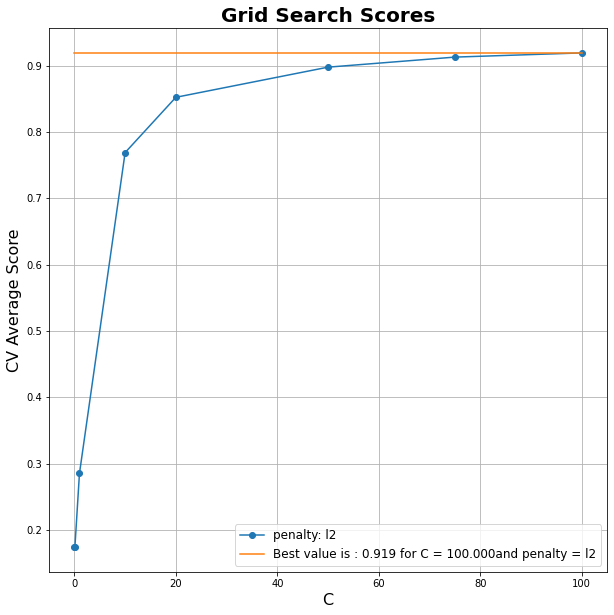

In [69]:
# create an instance of the LogisticRegressionClassifier class with a dictionary of hyperparameters to search over
logistic_classifier = LogisticRegression_Classifier({"C":[100,75,50,20, 10, 1.0, 0.1, 0.01],"penalty":['l2']})

# find the best hyperparameters for the classifier
logistic_best_params = logistic_classifier.hyperparameter_search(X_train, y_train, k=5,graphic=True)
print(logistic_best_params)

In [70]:
logistic_classifier = LogisticRegression_Classifier()
logistic_classifier.setParameter(logistic_best_params)

logistic_classifier.train(X_train,y_train)

y_pred = logistic_classifier.predict(X_test)

# use the LabelEncoder object to transform your data
score = logistic_classifier.error(y_pred,y_test)
f1_parameters.append(score['f1-score'])

print(score)

{'f1-score': 0.9444444444444444}


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[100, 'l2']
{'C': 100, 'penalty': 'l2'}


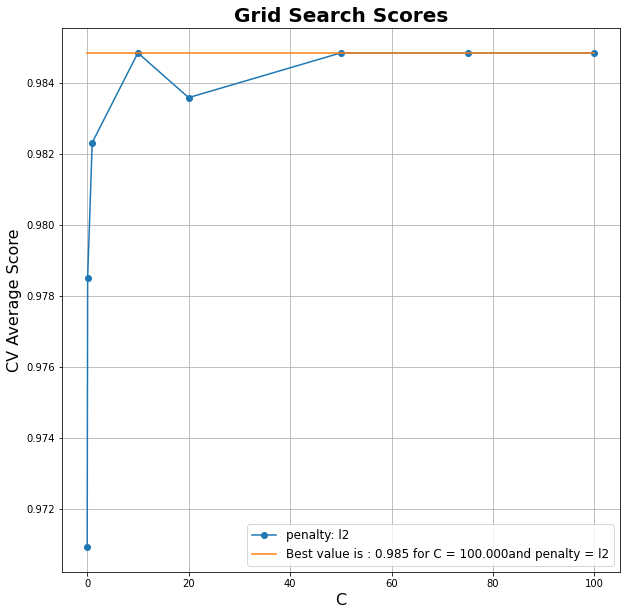

In [71]:
# create an instance of the LogisticRegressionClassifier class with a dictionary of hyperparameters to search over
logistic_classifier = LogisticRegression_Classifier({"C":[100,75,50,20, 10, 1.0, 0.1, 0.01],'penalty':['l2']})

# find the best hyperparameters for the classifier
logistic_best_params = logistic_classifier.hyperparameter_search(X_train_normalized, y_train, k=5,graphic=True)
print(logistic_best_params)

#### Données normalisées

In [21]:
logistic_classifier = LogisticRegression_Classifier()
logistic_classifier.train(X_train_normalized,y_train)

y_pred = logistic_classifier.predict(X_test_normalized)
score = logistic_classifier.error(y_pred,y_test)

f1_normalized_no_parameters.append(score['f1-score'])
print(score)

{'f1-score': 0.98989898989899}


In [22]:
logistic_classifier = LogisticRegression_Classifier()
logistic_classifier.setParameter(logistic_best_params)

logistic_classifier.train(X_train_normalized,y_train)

y_pred = logistic_classifier.predict(X_test_normalized)

# use the LabelEncoder object to transform your data
score = logistic_classifier.error(y_pred,y_test)
f1_normalized_parameters.append(score['f1-score'])

print(score)

{'f1-score': 0.98989898989899}


### 3. SVM

#### Données non normalisées

In [23]:
models.append('SVM')

svm_classifier = SVM_Classifier()
svm_classifier.train(X_train,y_train)

y_pred = svm_classifier.predict(X_test)
score = svm_classifier.error(y_pred,y_test)

f1_no_parameters.append(score['f1-score'])
print(score)

{'f1-score': 0.6717171717171717}


Fitting 5 folds for each of 22 candidates, totalling 110 fits
[1e-05, 'l1']
{'alpha': 1e-05, 'penalty': 'l1'}


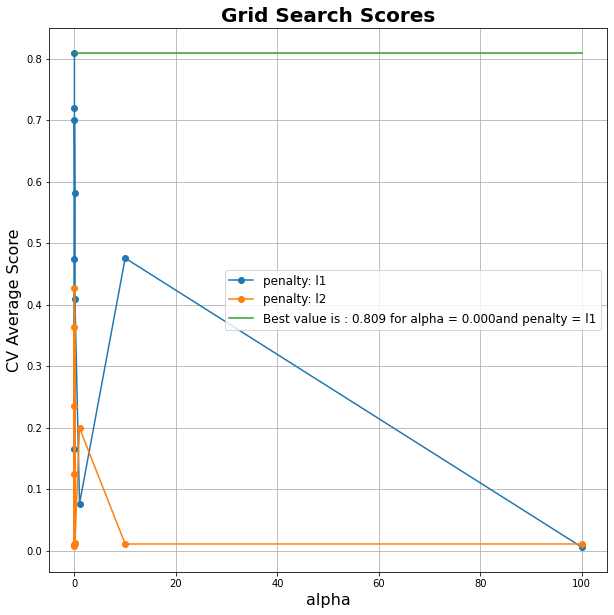

In [24]:
# create an instance of the SVMClassifier class with a dictionary of hyperparameters to search over
svm_classifier = SVM_Classifier({"alpha":[1e-5,5e-4,1e-4,5e-3,1e-3,5e-2,1e-2, 1e-1, 1e0, 1e1, 1e2],"penalty":['l1','l2']})

# find the best hyperparameters for the classifier
svm_best_params = svm_classifier.hyperparameter_search(X_train, y_train, k=5,graphic=True)
print(svm_best_params)

In [25]:
svm_classifier = SVM_Classifier()
svm_classifier.setParameter(svm_best_params)

svm_classifier.train(X_train,y_train)

y_pred = svm_classifier.predict(X_test)

# use the LabelEncoder object to transform your data
score = svm_classifier.error(y_pred,y_test)
f1_parameters.append(score['f1-score'])

print(score)

{'f1-score': 0.8585858585858586}


#### Données normalisées

In [26]:
svm_classifier = SVM_Classifier()
svm_classifier.train(X_train_normalized,y_train)

y_pred = svm_classifier.predict(X_test_normalized)
score = svm_classifier.error(y_pred,y_test)

f1_normalized_no_parameters.append(score['f1-score'])
print(score)

{'f1-score': 0.9797979797979798}


Fitting 5 folds for each of 22 candidates, totalling 110 fits
[0.0001, 'l2']
{'alpha': 0.0001, 'penalty': 'l2'}


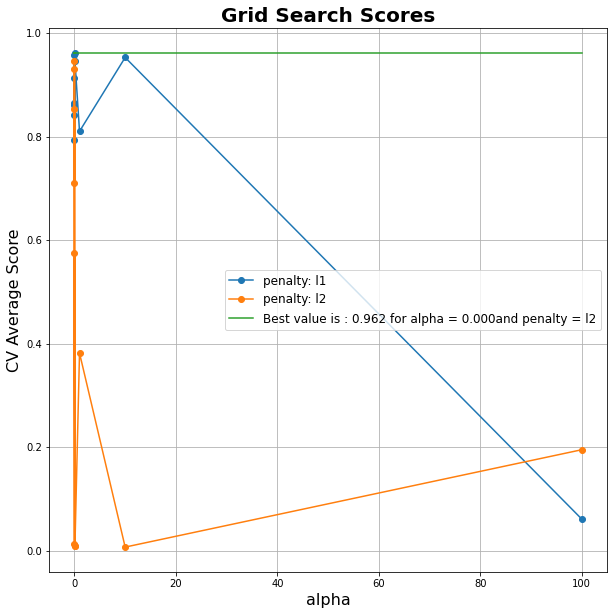

In [27]:
# create an instance of the SVMClassifier class with a dictionary of hyperparameters to search over
svm_classifier = SVM_Classifier({"alpha":[1e-5,5e-4,1e-4,5e-3,1e-3,5e-2,1e-2, 1e-1, 1e0, 1e1, 1e2],"penalty":['l1','l2']})

# find the best hyperparameters for the classifier
svm_best_params = svm_classifier.hyperparameter_search(X_train_normalized, y_train, k=5,graphic=True)
print(svm_best_params)

In [28]:
svm_classifier = SVM_Classifier()
svm_classifier.setParameter(svm_best_params)

svm_classifier.train(X_train_normalized,y_train)

y_pred = svm_classifier.predict(X_test_normalized)

# use the LabelEncoder object to transform your data
score = svm_classifier.error(y_pred,y_test)
f1_normalized_parameters.append(score['f1-score'])

print(score)

{'f1-score': 0.9393939393939394}


#### 4. Perceptron

#### Données non normalisées

In [29]:
models.append('Perceptron')

perceptron_classifier = Perceptron_Classifier()
perceptron_classifier.train(X_train,y_train)

y_pred = perceptron_classifier.predict(X_test)
score = perceptron_classifier.error(y_pred,y_test)

f1_no_parameters.append(score['f1-score'])
print(score)

{'f1-score': 0.4090909090909091}


Fitting 5 folds for each of 22 candidates, totalling 110 fits
[1e-05, 'l2']
{'alpha': 1e-05, 'penalty': 'l2'}


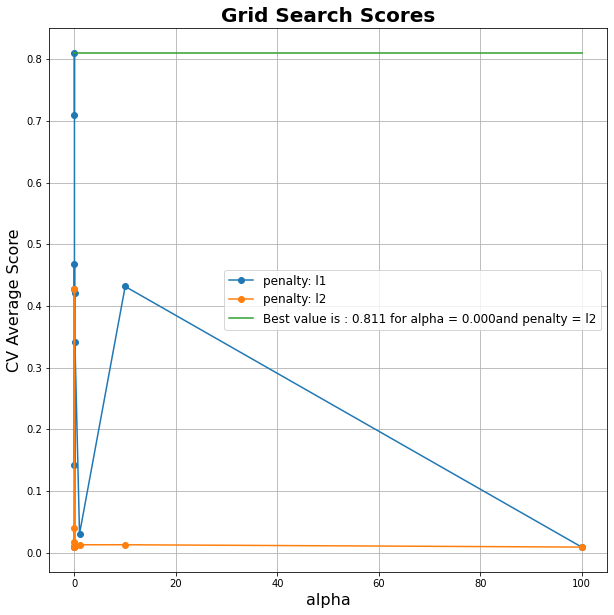

In [30]:
# create an instance of the Perceptron_Classifier class with a dictionary of hyperparameters to search over
perceptron_classifier = Perceptron_Classifier({"alpha":[1e-5,5e-4,1e-4,5e-3,1e-3,5e-2,1e-2, 1e-1, 1e0, 1e1, 1e2],"penalty":['l1','l2']})

# find the best hyperparameters for the classifier
perceptron_best_params = perceptron_classifier.hyperparameter_search(X_train, y_train, k=5,graphic=True)
print(perceptron_best_params)

In [31]:
perceptron_classifier = Perceptron_Classifier()
perceptron_classifier.setParameter(perceptron_best_params)

perceptron_classifier.train(X_train,y_train)

y_pred = perceptron_classifier.predict(X_test)

# use the LabelEncoder object to transform your data
score = perceptron_classifier.error(y_pred,y_test)
f1_parameters.append(score['f1-score'])

print(score)

{'f1-score': 0.8787878787878788}


#### Données normalisées

In [32]:
perceptron_classifier = Perceptron_Classifier()
perceptron_classifier.train(X_train_normalized,y_train)

y_pred = perceptron_classifier.predict(X_test_normalized)
score = perceptron_classifier.error(y_pred,y_test)

f1_normalized_no_parameters.append(score['f1-score'])
print(score)

{'f1-score': 0.9646464646464646}


Fitting 5 folds for each of 22 candidates, totalling 110 fits
[0.0001, 'l2']
{'alpha': 0.0001, 'penalty': 'l2'}


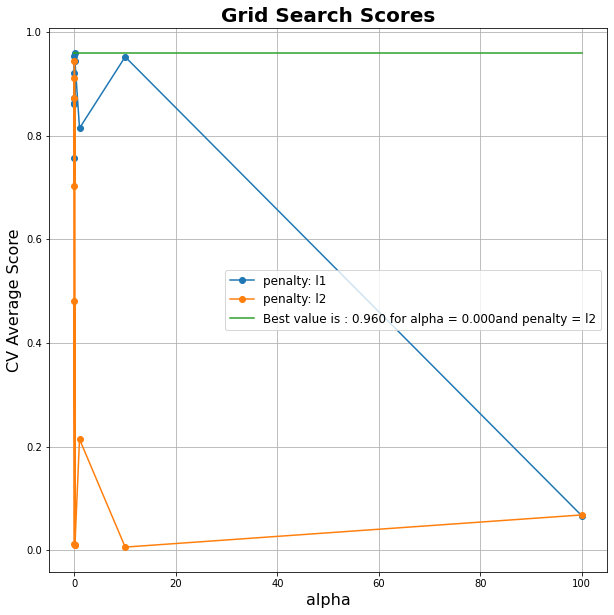

In [33]:
# create an instance of the Perceptron_Classifier class with a dictionary of hyperparameters to search over
perceptron_classifier = Perceptron_Classifier({"alpha":[1e-5,5e-4,1e-4,5e-3,1e-3,5e-2,1e-2, 1e-1, 1e0, 1e1, 1e2],"penalty":['l1','l2']})

# find the best hyperparameters for the classifier
perceptron_best_params = perceptron_classifier.hyperparameter_search(X_train_normalized, y_train, k=5,graphic=True)
print(perceptron_best_params)

In [34]:
perceptron_classifier = Perceptron_Classifier()
perceptron_classifier.setParameter(perceptron_best_params)

perceptron_classifier.train(X_train_normalized,y_train)

y_pred = perceptron_classifier.predict(X_test_normalized)

# use the LabelEncoder object to transform your data
score = perceptron_classifier.error(y_pred,y_test)
f1_normalized_parameters.append(score['f1-score'])

print(score)

{'f1-score': 0.9545454545454546}


### 5. Random Forest

#### Données non normalisées

In [35]:
models.append('Random Forest')

rdforest_classifier = RandomForest_Classifier()
rdforest_classifier.train(X_train,y_train)

y_pred = rdforest_classifier.predict(X_test)
score = rdforest_classifier.error(y_pred,y_test)

f1_no_parameters.append(score['f1-score'])
print(score)

{'f1-score': 0.9646464646464646}


Fitting 5 folds for each of 14 candidates, totalling 70 fits
['gini', 300]
{'criterion': 'gini', 'n_estimators': 300}


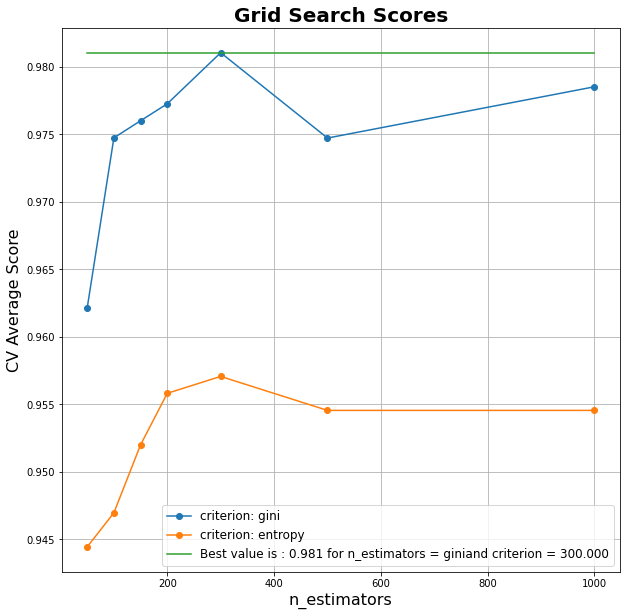

In [36]:
# create an instance of the RandomForest_Classifier class with a dictionary of hyperparameters to search over
rdforest_classifier = RandomForest_Classifier({"n_estimators":[50,100,150,200,300,500,1000],"criterion":["gini", "entropy"]})

# find the best hyperparameters for the classifier
rdforest_best_params = rdforest_classifier.hyperparameter_search(X_train, y_train, k=5,graphic=True)
print(rdforest_best_params)

In [37]:
rdforest_classifier = RandomForest_Classifier()
rdforest_classifier.setParameter(rdforest_best_params)

rdforest_classifier.train(X_train,y_train)

y_pred = rdforest_classifier.predict(X_test)

# use the LabelEncoder object to transform your data
score = rdforest_classifier.error(y_pred,y_test)
f1_parameters.append(score['f1-score'])

print(score)

{'f1-score': 0.9797979797979798}


#### Données normalisées

In [38]:
rdforest_classifier = RandomForest_Classifier()
rdforest_classifier.train(X_train_normalized,y_train)

y_pred = rdforest_classifier.predict(X_test_normalized)
score = rdforest_classifier.error(y_pred,y_test)

f1_normalized_no_parameters.append(score['f1-score'])
print(score)

{'f1-score': 0.9747474747474747}


Fitting 5 folds for each of 14 candidates, totalling 70 fits
['gini', 500]
{'criterion': 'gini', 'n_estimators': 500}


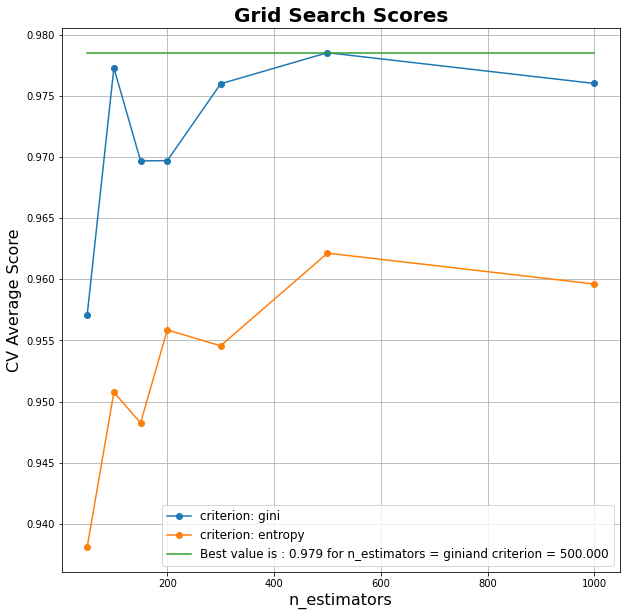

In [39]:
# create an instance of the RandomForest_Classifier class with a dictionary of hyperparameters to search over
rdforest_classifier = RandomForest_Classifier({"n_estimators":[50,100,150,200,300,500,1000],"criterion":["gini", "entropy"]})

# find the best hyperparameters for the classifier
rdforest_best_params = rdforest_classifier.hyperparameter_search(X_train_normalized, y_train, k=5,graphic=True)
print(rdforest_best_params)

In [40]:
rdforest_classifier = RandomForest_Classifier()
rdforest_classifier.setParameter(rdforest_best_params)

rdforest_classifier.train(X_train_normalized,y_train)

y_pred = rdforest_classifier.predict(X_test_normalized)

# use the LabelEncoder object to transform your data
score = rdforest_classifier.error(y_pred,y_test)
f1_normalized_parameters.append(score['f1-score'])

print(score)

{'f1-score': 0.9848484848484849}


### 6. K-Nearest Neighborhood
#### Données non normalisées

In [41]:
models.append('KNN')

knn_classifier = KNN_Classifier()
knn_classifier.train(X_train,y_train)

y_pred = knn_classifier.predict(X_test)
score = knn_classifier.error(y_pred,y_test)

f1_no_parameters.append(score['f1-score'])
print(score)

{'f1-score': 0.8434343434343435}


Fitting 5 folds for each of 28 candidates, totalling 140 fits
[1, 1]
{'n_neighbors': 1, 'p': 1}


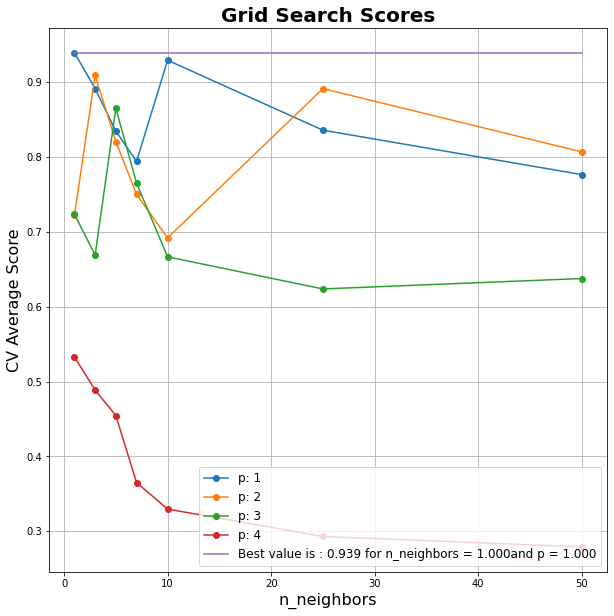

In [42]:
# create an instance of the KNN_Classifier class with a dictionary of hyperparameters to search over
knn_classifier = KNN_Classifier({"n_neighbors":[1,3,5,7,10,25,50],"p":[1,2,3,4]})

# find the best hyperparameters for the classifier
knn_best_params = knn_classifier.hyperparameter_search(X_train, y_train, k=5,graphic=True)
print(knn_best_params)

In [43]:
knn_classifier = KNN_Classifier()
knn_classifier.setParameter(knn_best_params)

knn_classifier.train(X_train,y_train)

y_pred = knn_classifier.predict(X_test)

# use the LabelEncoder object to transform your data
score = knn_classifier.error(y_pred,y_test)
f1_parameters.append(score['f1-score'])

print(score)

{'f1-score': 0.9646464646464646}


#### Données normalisées

In [44]:
knn_classifier = KNN_Classifier()
knn_classifier.train(X_train_normalized,y_train)

y_pred = knn_classifier.predict(X_test_normalized)
score = knn_classifier.error(y_pred,y_test)

f1_normalized_no_parameters.append(score['f1-score'])
print(score)

{'f1-score': 0.9646464646464646}


Fitting 5 folds for each of 28 candidates, totalling 140 fits
[1, 1]
{'n_neighbors': 1, 'p': 1}


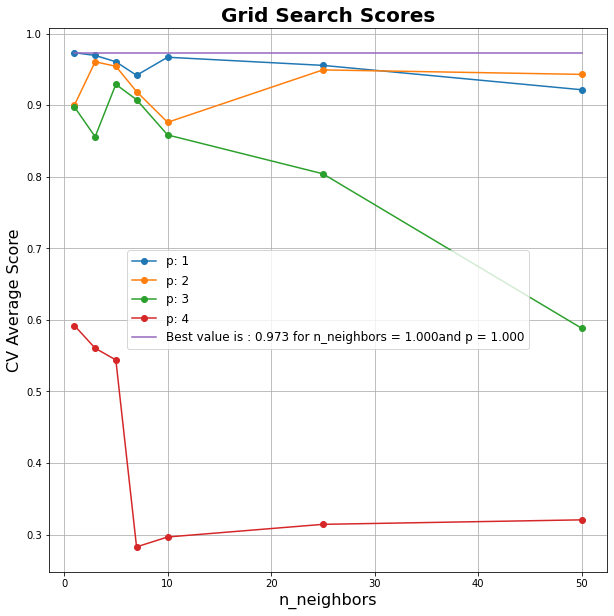

In [45]:
# create an instance of the KNN_Classifier class with a dictionary of hyperparameters to search over
knn_classifier = KNN_Classifier({"n_neighbors":[1,3,5,7,10,25,50],"p":[1,2,3,4]})

# find the best hyperparameters for the classifier
knn_best_params = knn_classifier.hyperparameter_search(X_train_normalized, y_train, k=5,graphic=True)
print(knn_best_params)

In [46]:
knn_classifier = KNN_Classifier()
knn_classifier.setParameter(knn_best_params)

knn_classifier.train(X_train_normalized,y_train)

y_pred = knn_classifier.predict(X_test_normalized)

# use the LabelEncoder object to transform your data
score = knn_classifier.error(y_pred,y_test)
f1_normalized_parameters.append(score['f1-score'])

print(score)

{'f1-score': 0.9797979797979798}


## Évaluation des classifieurs

### F1-scores pour chaque classifieur

In [47]:
result = pd.DataFrame(data = {'models':models,'f1 score':f1_no_parameters,'f1 score hyperparameters':f1_parameters, 'f1 score normalized':f1_normalized_no_parameters, "f1 score normalized hyperparameters":f1_normalized_parameters})
result

,models,f1 score,f1 score hyperparameters,f1 score normalized,f1 score normalized hyperparameters
0,GaussianNB,0.621212,0.954545,0.611111,0.974747
1,BernoulliNB,0.813131,0.803030,0.954545,0.959596
2,LogisticRegression,0.525253,0.944444,0.989899,0.989899
3,SVM,0.671717,0.858586,0.979798,0.939394
4,Perceptron,0.409091,0.878788,0.964646,0.954545
5,Random Forest,0.964646,0.979798,0.974747,0.984848
6,KNN,0.843434,0.964646,0.964646,0.979798


### Visualisation graphique des F1-scores

In [48]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='No Hyperparameters', x=result.models, y=result['f1 score']),
    go.Bar(name='Hyperparameters', x=result.models, y=result['f1 score hyperparameters']),
    go.Bar(name='Normalized no Hyperparameters', x=result.models, y=result['f1 score normalized']),
    go.Bar(name='Normalized hyper parameters', x=result.models, y=result['f1 score normalized hyperparameters'])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()